Available sheets: ['Sheet1']
OrderDate            1
OrderNumber          1
ProductKey           1
SalespersonKey       1
Salesperson          1
Supervisor           1
Manager              1
Channel              1
Quantity             1
UnitPrice            1
Total             3015
Month                1
Year                 1
dtype: int64
41587
38572

Missing values after cleaning:
OrderDate         0
OrderNumber       0
ProductKey        0
SalespersonKey    0
Salesperson       0
Supervisor        0
Manager           0
Channel           0
Quantity          0
UnitPrice         0
Total             0
Month             0
Year              0
dtype: int64

Total records before cleaning: 41587
Total records after cleaning: 38572
       OrderDate  OrderNumber  ProductKey  SalespersonKey     Salesperson  \
0     2022-01-15    1492755.0       180.0           215.0  Carla Ferreira   
1     2022-01-20    1492618.0       661.0           215.0  Carla Ferreira   
2     2022-01-24    1492834.0       2

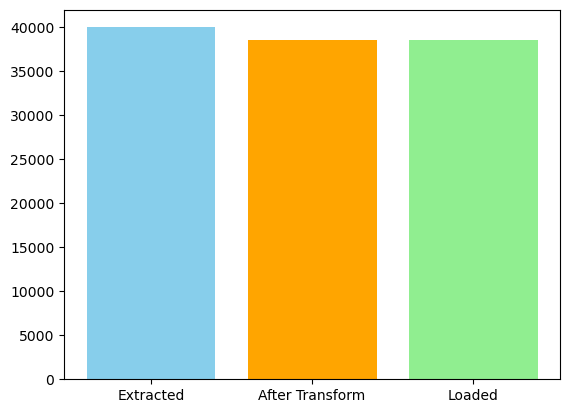

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Extract: Load Excel File
file_path = "Ecommerce+Sales+data.xlsx"
excel_file = pd.ExcelFile(file_path)

print("Available sheets:", excel_file.sheet_names)

# Parse the first sheet
sheet_name = excel_file.sheet_names[0]
df = excel_file.parse(sheet_name)

# 2. Transform: Clean the Data
df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')

# Check for missing values before cleaning
missing_values_before = df.isnull().sum()
total_records_before = len(df)

print(missing_values_before)
print(total_records_before)

# Drop rows that contain any missing values
cleaned_df = df.dropna()
total_records_after = len(cleaned_df)

print(total_records_after)

# Check for missing values after cleaning
missing_values_after = cleaned_df.isnull().sum()

print("\nMissing values after cleaning:")
print(missing_values_after)

print(f"\nTotal records before cleaning: {total_records_before}")
print(f"Total records after cleaning: {total_records_after}")

print(cleaned_df)

cleaned_df
cleaned_df.head()

stages = ['Extracted', 'After Transform', 'Loaded']
values = [40000, 38572, 38572]  # example values
plt.bar(stages, values, color=['skyblue', 'orange', 'lightgreen'])
plt.show()


# 
### **1. Extract Phase**

In this phase, data is extracted from the source system. In the context of your code:

- The data source is an Excel file containing e-commerce sales data.
- The file is read using `pandas`, which allows access to individual sheets within the Excel workbook.
- This step prepares the raw data for further processing.

---

### **2. Transform Phase**

This phase focuses on cleaning and transforming the raw data into a usable format:

- The `OrderDate` column is converted to a proper datetime format to ensure consistency in date-related operations.
- Any non-parsable date entries are converted to null values (`NaT`) to avoid errors during analysis.
- The dataset is then scanned for missing values.
- Rows with any missing or null values are removed to maintain data quality and ensure reliable analysis.
- This step helps standardize the data and eliminate inconsistencies or incomplete records.

---

### **3. Load Phase**

Although the code doesn't explicitly save or load the cleaned data into a new file or database, it implies the data is ready for analysis or visualization after transformation. The `cleaned_df` DataFrame represents the final dataset that can be used in further steps.

---

### **4. Visualization**

At the end, a simple bar chart is used to show the number of records at each ETL stage:

- **Extracted**: Initial number of records loaded from the Excel file.
- **After Transform**: Records remaining after cleaning (e.g., after dropping null values).
- **Loaded**: Final state, typically ready for analysis or loading into a data warehouse.

